**Criando um modelo preditivo que busca responder a pergunta:**
* O preço das ações do índice da Bovespa, o BOVA11, vai subir ou cair amanhã?
* Com esta resposta em mãos, o investidor pode decidir se vai comprar ou não as ações deste índice.
* O Bova11 é o antigo IBovespa, e é uma cesta das ações mais negociadas na Bolsa de São Paulo

In [183]:
# importando os pacotes necessários 
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
!pip install yfinance

In [185]:
import yfinance as yf

In [186]:
bova11 = yf.Ticker("BOVA11.SA")

In [187]:
bova11 = bova11.history(period="max")

In [188]:
bova11.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-11-28 00:00:00-02:00,36.595901,36.595901,36.595901,36.595901,0,0,0
2008-12-01 00:00:00-02:00,34.744900,34.744900,34.744900,34.744900,0,0,0
2008-12-02 00:00:00-02:00,35.001598,35.001598,35.001598,35.001598,0,0,0
2008-12-03 00:00:00-02:00,35.293800,35.293800,35.293800,35.293800,0,0,0
2008-12-04 00:00:00-02:00,35.122101,35.122101,35.122101,35.122101,0,0,0


In [192]:
len(bova11)

3440

In [194]:
bova11.index

DatetimeIndex(['2008-11-28 00:00:00-02:00', '2008-12-01 00:00:00-02:00',
               '2008-12-02 00:00:00-02:00', '2008-12-03 00:00:00-02:00',
               '2008-12-04 00:00:00-02:00', '2008-12-05 00:00:00-02:00',
               '2008-12-08 00:00:00-02:00', '2008-12-09 00:00:00-02:00',
               '2008-12-10 00:00:00-02:00', '2008-12-11 00:00:00-02:00',
               ...
               '2022-09-28 00:00:00-03:00', '2022-09-29 00:00:00-03:00',
               '2022-09-30 00:00:00-03:00', '2022-10-03 00:00:00-03:00',
               '2022-10-04 00:00:00-03:00', '2022-10-05 00:00:00-03:00',
               '2022-10-06 00:00:00-03:00', '2022-10-07 00:00:00-03:00',
               '2022-10-10 00:00:00-03:00', '2022-10-11 00:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=3440, freq=None)

**Plotando a série temporal de todos os dados disponíveis do índice BOVA11**

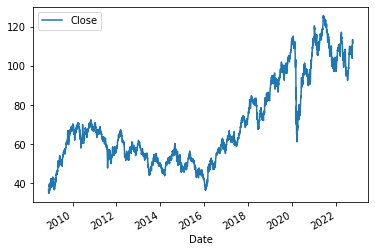

In [195]:
bova11.plot(y='Close')
plt.show()

In [196]:
# deletando duas colunas pouco úteis para o modelo 
del bova11['Dividends']
del bova11['Stock Splits']

In [197]:
# criando uma coluna auxiliar ( a coluna 'Amanhâ') que vai nos ajudar a criar a coluna 'Target'
# Será a coluna 'Target' que vai nos responder se o preço vai subir ou cair.
# a pergunta que estamos tentando responder é: o preço da ação vai subir ou cair ?
bova11['Amanha'] = bova11['Close'].shift(-1)

In [198]:
bova11.head(2)

,Open,High,Low,Close,Volume,Amanha
Date,,,,,,
2008-11-28 00:00:00-02:00,36.595901,36.595901,36.595901,36.595901,0,34.744900
2008-12-01 00:00:00-02:00,34.744900,34.744900,34.744900,34.744900,0,35.001598


In [199]:
# a coluna 'Target' responde a pergunta: o preço subiu ou caiu? 
# quando a coluna tem valor '0' é sinal que o preço diminuiu, se a coluna tem valor '1', o preço subiu
bova11['Target'] = (bova11['Amanha'] > bova11['Close']).astype(int)

In [200]:
bova11.head()

,Open,High,Low,Close,Volume,Amanha,Target
Date,,,,,,,
2008-11-28 00:00:00-02:00,36.595901,36.595901,36.595901,36.595901,0,34.744900,0
2008-12-01 00:00:00-02:00,34.744900,34.744900,34.744900,34.744900,0,35.001598,1
2008-12-02 00:00:00-02:00,35.001598,35.001598,35.001598,35.001598,0,35.293800,1
2008-12-03 00:00:00-02:00,35.293800,35.293800,35.293800,35.293800,0,35.122101,0
2008-12-04 00:00:00-02:00,35.122101,35.122101,35.122101,35.122101,0,35.340000,1


In [201]:
# subsetting o dataset para registros apenas de a partir de 2012
# limitando a quantidade de registros para análise
bova11 = bova11.loc["2008-10-10 00:00:00-02:00":].copy()

In [202]:
bova11.head(2)

,Open,High,Low,Close,Volume,Amanha,Target
Date,,,,,,,
2008-11-28 00:00:00-02:00,36.595901,36.595901,36.595901,36.595901,0,34.744900,0
2008-12-01 00:00:00-02:00,34.744900,34.744900,34.744900,34.744900,0,35.001598,1


**Criando e treinando o modelo**

In [203]:
# Baixando o modelo RandomForest
# Escolhi o modelo RandomForest porque ele consegue enxergar bem tendências não lineares nos dados
# E as relações entre as variáveis num data set de bolsa de valores raramente é linear.
# No mercado de ações as relações não são lineares.
# por exemplo, o preço de abertura ('open') não está linearmente correlacionado com o valor da coluna 'Target'.
# Não existe relação linear entre o preço de abertura e target. Por exemplo, se uma variável aumentar, a outra tb vai aumentar
# ... se vc conseguir encontrar uma relação linear, vai conseguir ganhar muito dinheiro ...
from sklearn.ensemble import RandomForestClassifier

In [204]:
# Escolhendo os hiperparâmetros do modelo: n_estimators e min_samples_split
# n_estimators é o número de arvores de decisão que vc quer treinar
# quanto maior for este número, mais acurado/preciso vai ser o seu modelo 
# isso vai até um certo limite, pq senão causa overfitting
# usando o parametro 'min_samples_split' para evitar overfitting
# usando 'random_state' para preservar os resultados, caso desejarmos reutilizar o modelo
model = RandomForestClassifier(n_estimators = 75, min_samples_split = 25, random_state=5)

In [205]:
# repartindo o data set em treino e teste 
# como é um data set de série temporal não dá para usar cross_validation
# se vc usar cross_validatation, vc pode acabar usando dados do futuro para prever o passado
# esse erro se chama 'Leakage'- vc está vazando informações para o seu modelo
train = bova11.iloc[:-100]
test = bova11.iloc[-100:]

predictors =["Close","Volume","Open","High","Low"]


In [206]:
## treinando o modelo - usando as colunas escolhidas em 'predictors' para tentar achar o valor da coluna "Target"
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=25, n_estimators=75, random_state=5)

**Avaliando a performance do modelo**

In [207]:
# medindo a acurácia, precisão do modelo
# medindo a performance do modelo - para saber se o modelo está realmente prevendo o que vc quer que ele preveja
# lembrando o objetivo do modelo: nós queremos que ele preveja quando a ação vai subir ou cair
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [208]:
preds

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [209]:
# convertendo preds em pandas Series
preds = pd.Series(preds, index=test.index)

In [210]:
preds[:2]

Date
2022-05-23 00:00:00-03:00    1
2022-05-24 00:00:00-03:00    0
dtype: int32

In [211]:
# traduzindo: a previsão só foi correta em 49% das vezes
# por exemplo: 'quando dizemos que o preço ia subir, ele só subiu 49% das vezes'
precision_score(test["Target"], preds)

0.4915254237288136

In [212]:
# concatenando os valores reais - test[Target] e os valores previstos num dataframe
# usando 'axis = 1' para a função tratar os dois inputs como colunas
combinado = pd.concat([test["Target"], preds], axis=1)

In [213]:
combinado.head(3)

,Target,0
Date,,
2022-05-23 00:00:00-03:00,0,1
2022-05-24 00:00:00-03:00,1,0
2022-05-25 00:00:00-03:00,1,1


In [214]:
# construindo um sistema de teste mais robusto
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combinado = pd.concat([test["Target"], preds], axis=1)
    return combinado

In [215]:
def backtest(data, model, predictors, start=100,step=10):
    all_predictions=[]
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [216]:
predictions = backtest(bova11, model, predictors)

In [217]:
# avaliando o erro das predições
predictions["Predictions"].value_counts()

1    1723
0    1617
Name: Predictions, dtype: int64

In [218]:
# traduzindo: o modelo foi preciso - acurado - em 52% dos casos
precision_score(predictions["Target"], predictions["Predictions"])

0.5235055136390018

In [219]:
# checando a porcentagem de dias em que o mercado realmente subiu
# traduzindo: o modelo que criamos só performou um pouquinho melhor q a vida real (somente 0.01 )
# a diferença entre os dados oferecidos pelo modelo e as previsoes é de ap
predictions["Target"].value_counts()/predictions.shape[0]

1    0.506287
0    0.493713
Name: Target, dtype: float64

**Aperfeiçoando novamente o modelo**

In [220]:
# Aperfeiçoando o modelo (para melhorar a precisão/acurácia), acrescentando mais colunas preditoras
# Vamos dar ao algoritmo mais informações, mais colunas preditoras para auxiliá-lo em seu cálculo preditivo. 
# As novas colunas serão montadas com as médias móveis do preço de fechamento ('Close') dentro destes horizontes temporais de ...
# ... 2, 5, 60 e 250 dias.
# Também vamos acrescentar outras colunas com a tendência de mudança no preço de fechamento, somando os valores da coluna ...
# 'Target' nestes horizontes temporais de 2, 5, 60 e 250 dias.

horizontes = [2, 5, 60, 250]
new_predictors = []

for horizonte in horizontes:
    medias_moveis = bova11.rolling(horizonte).mean()
    
    proporcao_coluna = f"Proporcao_Fechamento_{horizonte}"
    bova11[proporcao_coluna] = bova11['Close']/medias_moveis['Close']
    
    tendencia_coluna = f"Tendencia_{horizonte}"
    bova11[tendencia_coluna] = bova11.shift(1).rolling(horizonte).sum()["Target"] # soma móvel da coluna "Target"
    new_predictors +=[proporcao_coluna, tendencia_coluna]    

In [221]:
bova11.head(2)

,Open,High,Low,Close,Volume,Amanha,Target,Proporcao_Fechamento_2,Tendencia_2,Proporcao_Fechamento_5,Tendencia_5,Proporcao_Fechamento_60,Tendencia_60,Proporcao_Fechamento_250,Tendencia_250
Date,,,,,,,,,,,,,,,
2008-11-28 00:00:00-02:00,36.595901,36.595901,36.595901,36.595901,0,34.744900,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-01 00:00:00-02:00,34.744900,34.744900,34.744900,34.744900,0,35.001598,1,0.974054,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
len(bova11)

3440

In [223]:
bova11 =bova11.dropna()

In [224]:
len(bova11)

3189

**Aperfeiçoando o modelo**

In [225]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=45,random_state=5)

In [226]:
# construindo um sistema de teste mais robusto
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #retornando a probabilidade de que o preço vai subir ou não 
    preds[preds>=.6]=1 # aumentando o critério de previsão positiva para 60%
    preds[preds<.6]=0 
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combinado = pd.concat([test["Target"], preds], axis=1)
    return combinado

In [227]:
predictions = backtest(bova11, model,new_predictors)

In [228]:
predictions["Predictions"].value_counts()

0.0    2793
1.0     296
Name: Predictions, dtype: int64

In [229]:
# traduzindo: se comprarmos uma ação, em 55% das vezes,o preco vai subir
# a precisão/acurácia do modelo foi melhorada e passou de 52% para 55%
# calculando a precisão do modelo 
precision_score(predictions["Target"], predictions["Predictions"])

0.5540540540540541

* Este é apenas um modelo inicial. 
* Para aumentar essa taxa de precisão, 
* seria necessário incluir mais preditores, tais como inflação, taxa de juros SELIC, ou talvez um outro índice de bolsa como ...
* o SP500, de Nova York.